# (12104) Chesley orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)

In [3]:
body_id = '12104'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = nongrav_info['radius']
de_kernel = 441

In [4]:
add_gaia_obs = False
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias_lowres = True
deweight = True
eliminate = False
num_obs_per_night = 4
verbose = True
obs_df = fit.get_optical_obs(body_id, optical_obs_file, t_min_tdb, t_max_tdb, debias_lowres, deweight, eliminate, num_obs_per_night, verbose)
obs_df = fit.add_radar_obs(obs_df, t_min_tdb, t_max_tdb, verbose)
if add_gaia_obs:
    gaia_dr = 'gaiafpr'
    obs_df = fit.add_gaia_obs(obs_df, t_min_tdb, t_max_tdb, gaia_dr, verbose)

Read in 5327 observations from the MPC.
	Filtered to 5327 observations that satisfy the time range and accepted observatory constraints.
Applying Eggl et al. (2020) debiasing scheme to the observations.
	Unknown star catalog: UNK
	No debiasing needed for 4016 observations.
	Debiased 1289 observations.
	No bias information for 22 observations.
Applying Vereš et al. (2017) weighting scheme to the observations.
	Using 3169 CCD observations with station-specific weight rules.
Applying sqrt(N/4) deweighting scheme.
	Deweighted 2618 observations.


In [5]:
n_iter_max = 10
fit_sim = fit.FitSimulation(init_sol, obs_df, init_cov, n_iter_max=n_iter_max, de_kernel=de_kernel, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.788			 0.468			 2335.633			 0.219
2			 0.783			 0.466			 2317.224			 0.218
3			 0.783			 0.466			 2317.224			 0.218
Converged without rejecting outliers. Starting outlier rejection now...
4			 0.748			 0.423			 1903.205			 0.180
5			 0.748			 0.423			 1902.745			 0.180
6			 0.748			 0.423			 1902.745			 0.180
Converged after rejecting outliers. Rejected 28 out of 5327 optical observations.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 6 (of 6):
RMS unweighted: 0.7477080362515084
RMS weighted: 0.4226043341679304
chi-squared: 1902.7449853856226
reduced chi-squared: 0.1796398211277967
square root of reduced chi-squared: 0.4238393812846993
--------------------------------------------------------------
Solution Time: MJD 57961.000 TDB = 2017-07-27 00:00:00.000 TDB
Solution Observation Arc: 17590.37 days (48.16 years)
--------------------------------------------------------------
Fitted Variable		Initial Value			Uncertainty			Fitted Value			Uncertainty			Change				Change (sigma)
e			2.43913904678e-02		7.35286146464e-10		2.43913859494e-02		2.80414737495e-08		-4.51844577726e-09		-6.145
q			2.93690461742e+00		3.42303981575e-09		2.93690463284e+00		8.63619761811e-08		+1.54216976966e-08		+4.505
tp			5.87282599431e+04		6.77315762978e-06		5.87282596495e+04		3.47147996919e-04		-2.93640943710e-04		-43.354
om			7.80633002818e+01		1.26172827208e-07		7.80632704210e+01		1.56196030566e-

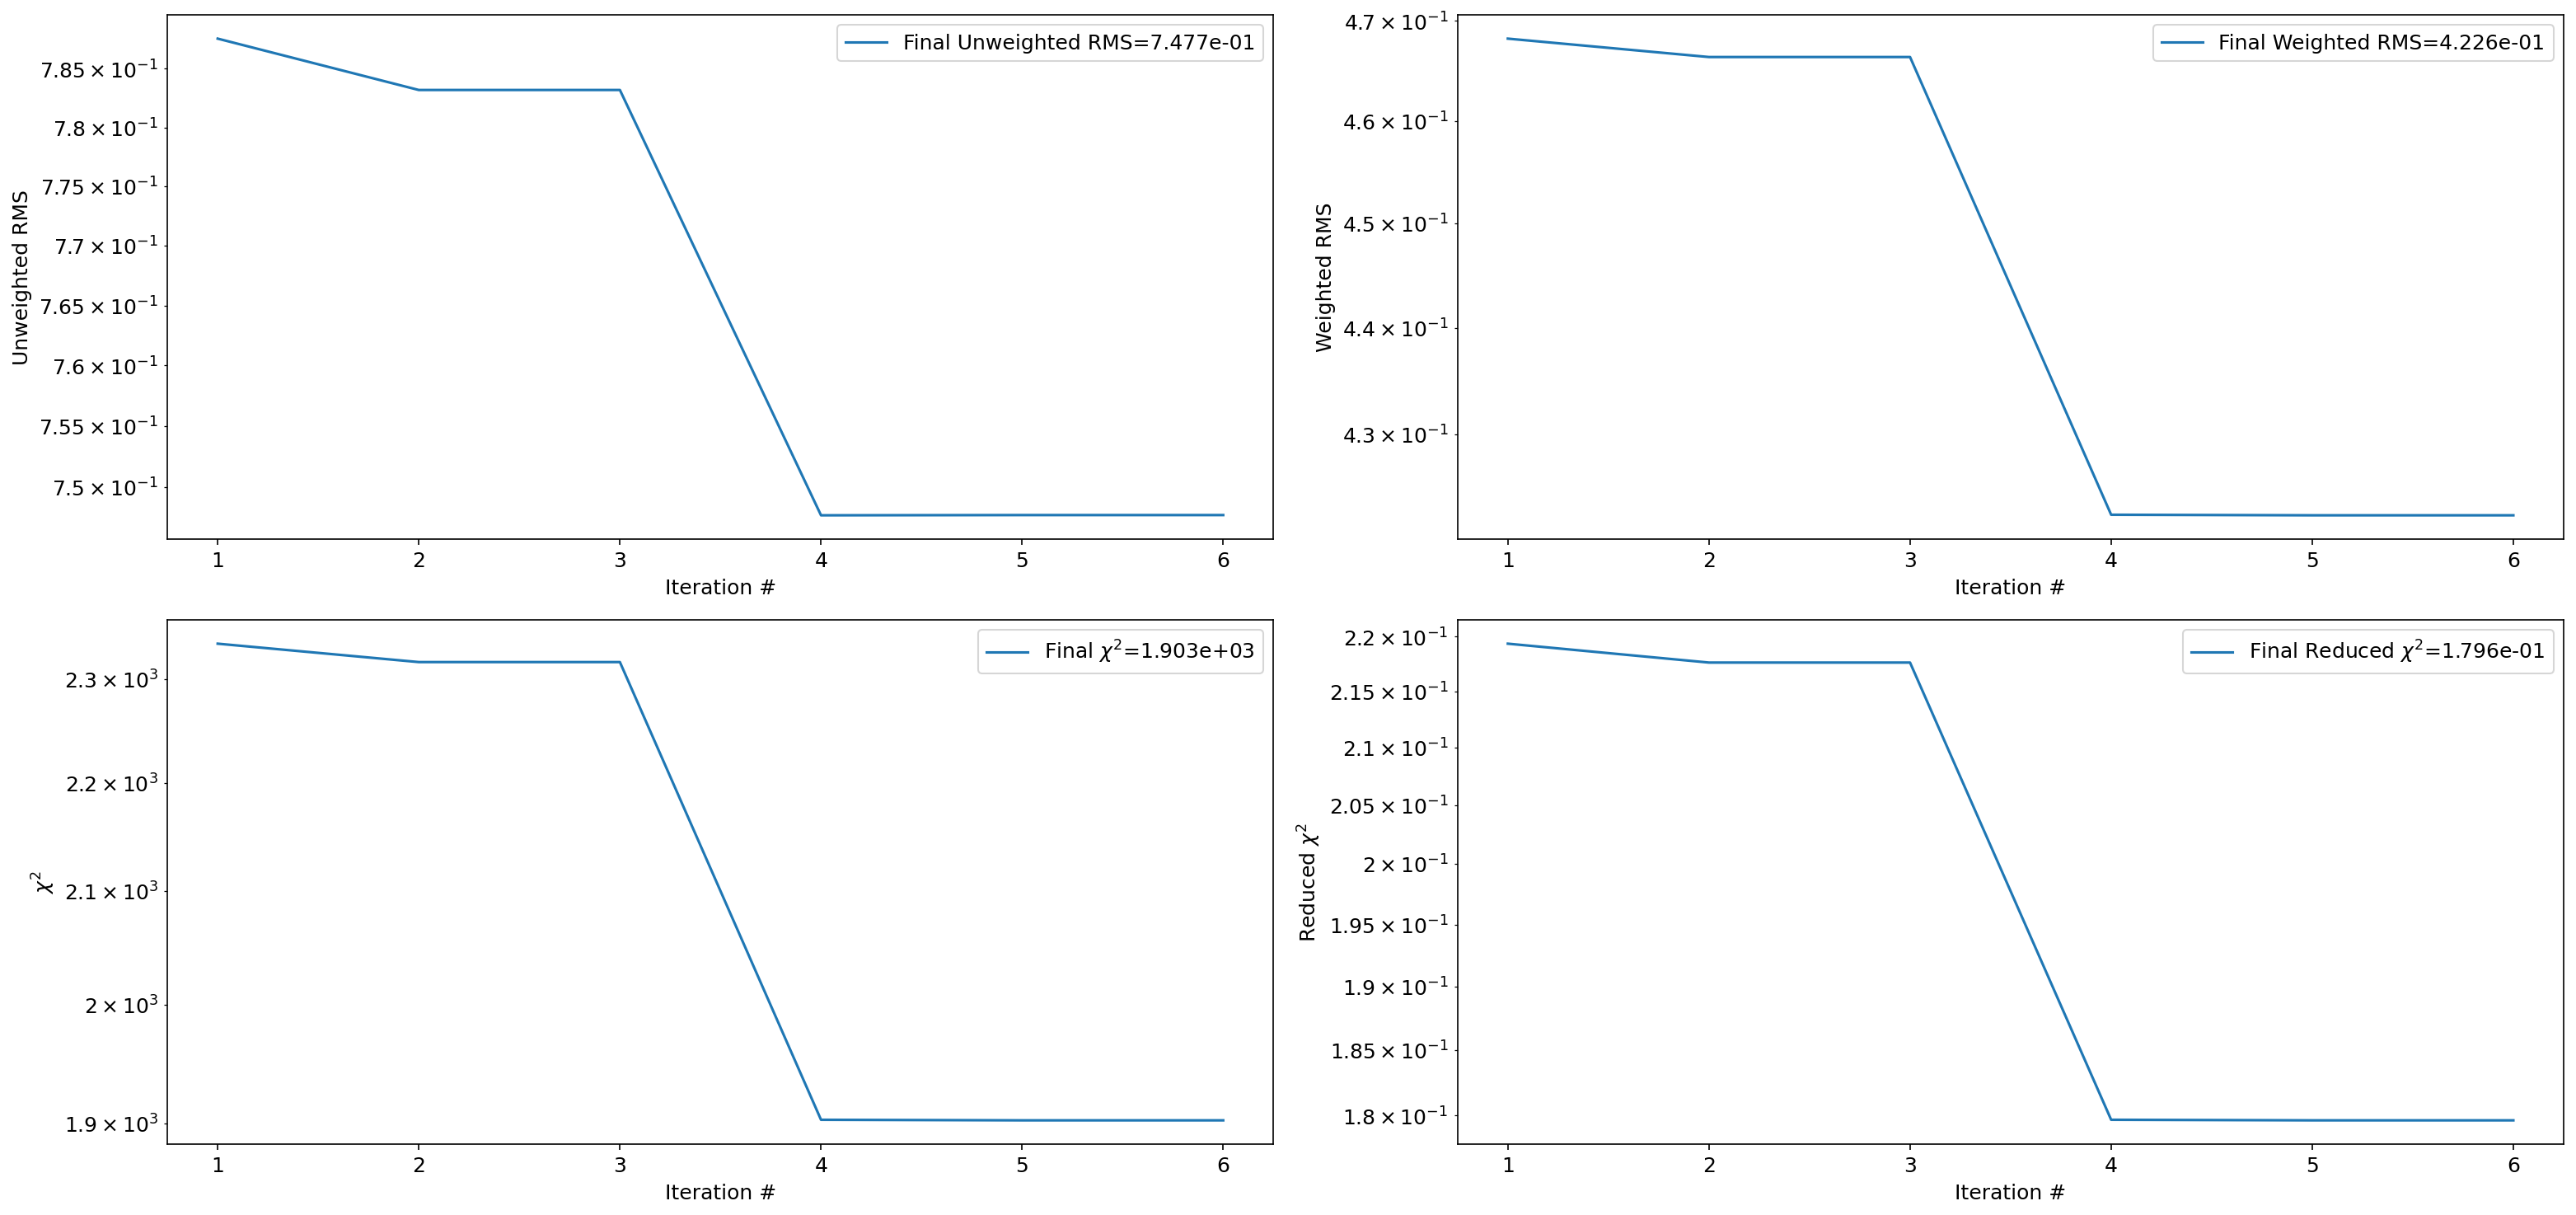

In [8]:
fit_sim.plot_summary(auto_close=True)

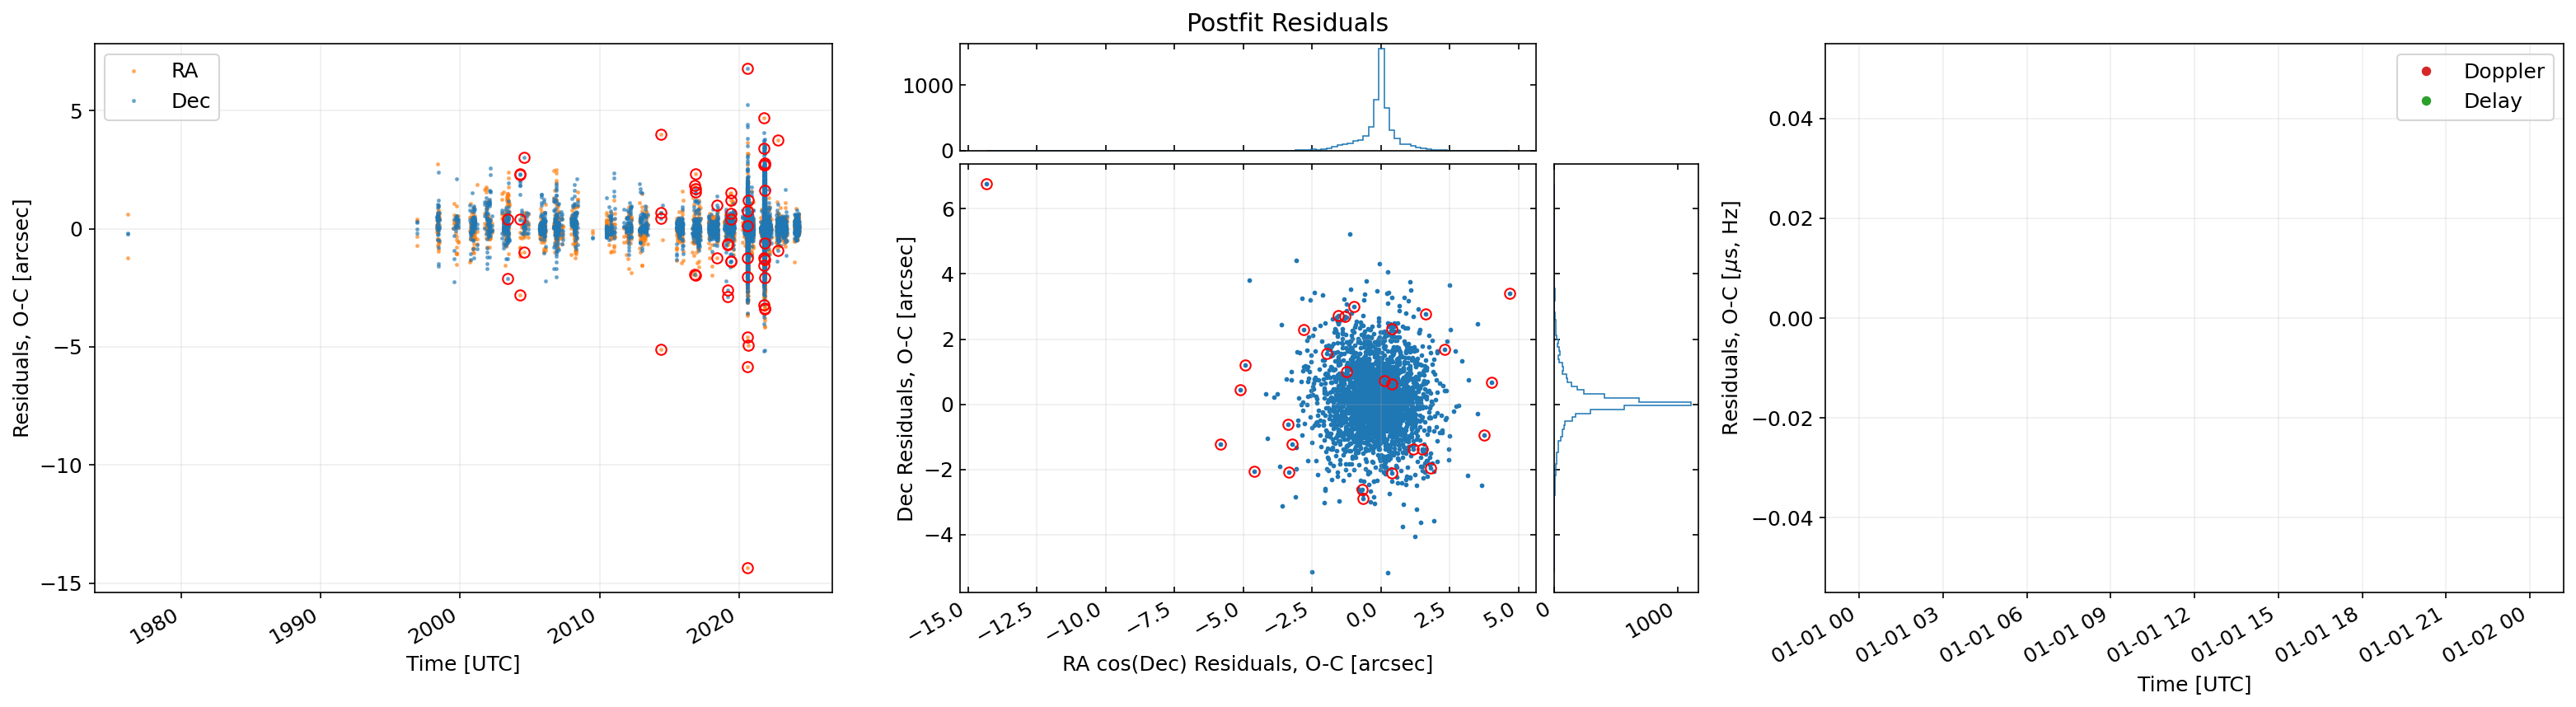

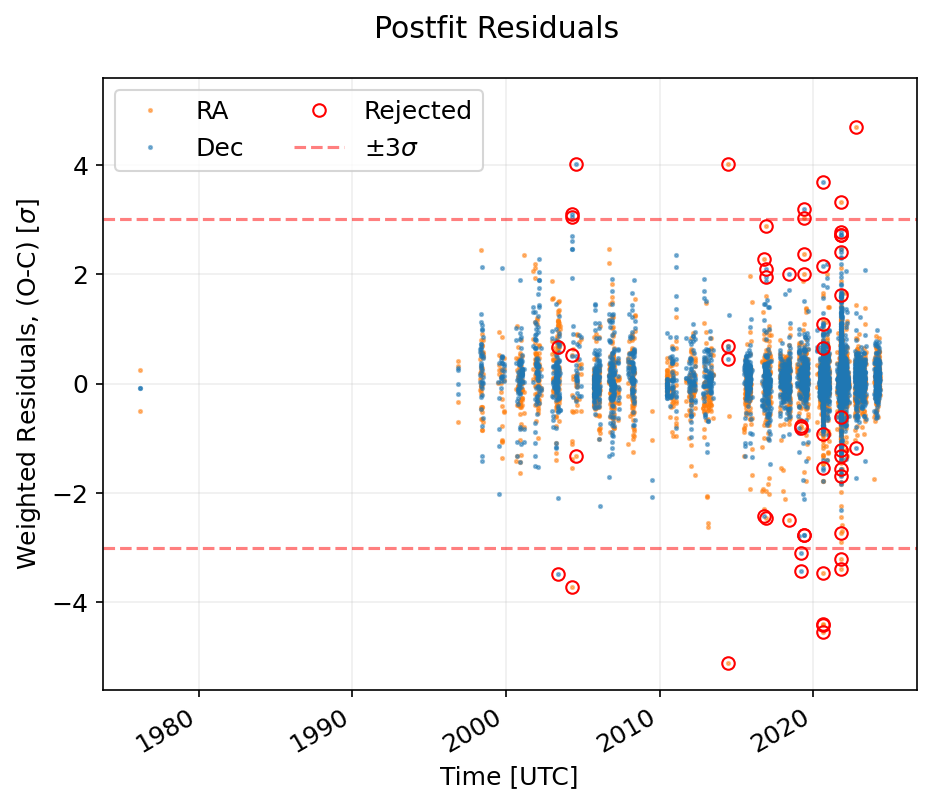

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 384.05
Mahalonobis distance between GRSS and JPL solution: 4.07
Bhattacharya distance between JPL and GRSS solution: 9.8626
Bhattacharya coefficient between JPL and GRSS solution: 0.0001


In [11]:
assert maha_dist_f < 5.0
assert maha_dist_0 < 5.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90

AssertionError: 